In [3]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [5]:
from pathlib import Path
import os

PROJ_ROOT = Path().resolve().parent
KEYS_DIR = PROJ_ROOT / 'keys' 
keys = KEYS_DIR / 'socos-quickstep-601-403a611fa9db.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = str(keys)

In [12]:
%%bigquery
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


In [16]:
from google.cloud import bigquery
client = bigquery.Client()

In [17]:
sql = """
SELECT
    gestation_weeks,
    COUNT(1) AS count
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
GROUP BY
    gestation_weeks
ORDER BY
    gestation_weeks
"""

df = client.query(sql).to_dataframe()

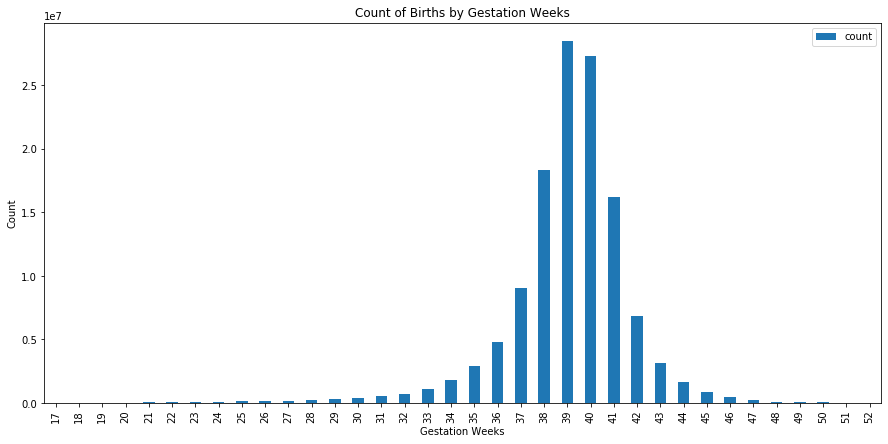

In [18]:
ax = df.plot(kind='bar', x='gestation_weeks', y='count', figsize=(15,7))
ax.set_title('Count of Births by Gestation Weeks')
ax.set_xlabel('Gestation Weeks')
ax.set_ylabel('Count');


In [8]:
%matplotlib inline

In [9]:
total_births.plot(kind='bar', x='year', y='birth_count')

NameError: name 'total_births' is not defined